In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
PATH = Path('/home/jupyter/reports')
assert PATH.exists()

In [4]:
!ls -latr {PATH}

total 184
-rw-r--r-- 1 root root 2120 Mar  8 17:59 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_0
-rw-r--r-- 1 root root 1767 Mar  8 21:17 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_3
-rw-r--r-- 1 root root 2475 Mar  9 00:03 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_1
-rw-r--r-- 1 root root 2652 Mar  9 03:04 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_2
-rw-r--r-- 1 root root 2654 Mar 15 04:37 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_1
-rw-r--r-- 1 root root 2669 Mar 15 10:37 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_2
-rw-r--r-- 1 root root 2648 Mar 15 16:39 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_3
-rw-r--r-- 1 root root 2657 Mar 17 17:56 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_ne

In [5]:
def plot_results(fpn_metrics):
    plt.figure(figsize=(15,5))
    n_e = np.arange(len(fpn_metrics['dice_metric_mean']))
    plt.plot(n_e, fpn_metrics['dice_metric_mean'], '-o', label='Valid dice metric', color='#ff7f0e')
    plt.plot(n_e, fpn_metrics['dice_coeff_mean'],'-o', label='Val dice_coeff', color='#1f77b4')
    plt.plot(n_e, fpn_metrics['iou_metric_mean'],'-o', label='Val dice_coeff', color='#2ca02c')

    def show_max(label = 'dice_metric_mean', col='#ff7f0e'):
        x = np.argmax( fpn_metrics[label] ); y = np.max( fpn_metrics[label] )
        xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
        plt.scatter(x,y,s=200,color=col); plt.text(x-0.03*xdist,y-0.13*ydist, f'max {label}\n%.2f'%y,size=14)

    show_max('dice_metric_mean', '#ff7f0e')
    show_max('dice_coeff_mean', '#1f77b4')
    show_max('iou_metric_mean', '#2ca02c')

    plt2 = plt.gca().twinx()
    plt2.plot(n_e, fpn_metrics['best_loss'],'-o',label='Val Loss',color='#d62728')

    plt.ylabel('dice_coe',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt.legend(loc=3)

In [7]:
metrics = pd.read_json(PATH/'49_pytorch_fpn_efficientnet-b7_1792_896_shifted_slices_groupkfold_smooth_b6_fold_0')
metrics

,avg_loss,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.048556,0.048556,0.939875,0.912760,0,0,0.887408
1,0.045263,0.045263,0.943425,0.917769,1,0,0.893749
2,0.045663,0.045263,0.943436,0.915095,2,0,0.893673
3,0.044264,0.044264,0.943720,0.916222,3,0,0.894195
4,0.045399,0.044264,0.943977,0.915541,4,0,0.894856
5,0.043249,0.043249,0.945581,0.917742,5,0,0.897549
6,0.041904,0.041904,0.945740,0.918793,6,0,0.897895
7,0.042193,0.041904,0.945586,0.917469,7,0,0.897664
8,0.041453,0.041453,0.945906,0.917019,8,0,0.898197
9,0.042993,0.041453,0.945604,0.918046,9,0,0.897666


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


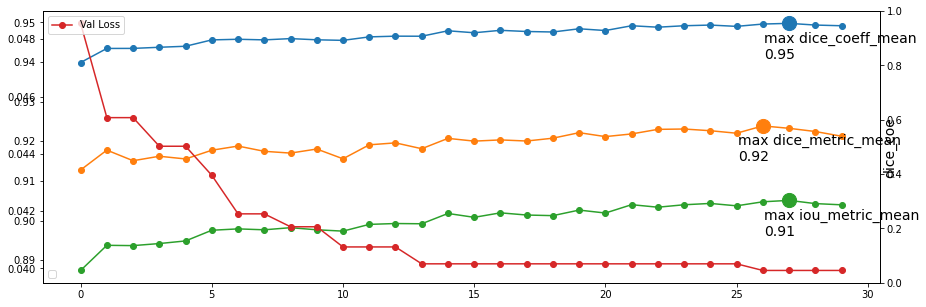

In [8]:
plot_results(metrics)

In [6]:
metrics = pd.read_json(PATH/'43_pytorch_unet_efficientnet_b7_2048_1024_shifted_slices_groupkfold_smooth_b6_fold_0')
metrics

,avg_loss,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.087902,0.087902,0.901791,0.850622,0,0,0.823178
1,0.047420,0.047420,0.932679,0.895966,1,0,0.875305
2,0.044678,0.044678,0.936365,0.900097,2,0,0.881427
3,0.046106,0.044678,0.935495,0.895350,3,0,0.880161
4,0.047389,0.044678,0.932986,0.898495,4,0,0.875835
5,0.052662,0.044678,0.924582,0.887871,5,0,0.861394
6,0.046768,0.044678,0.933064,0.900771,6,0,0.876847
7,0.051100,0.044678,0.927309,0.889823,7,0,0.867072
8,0.042373,0.042373,0.938126,0.904952,8,0,0.885089
9,0.041821,0.041821,0.939836,0.909636,9,0,0.887869


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


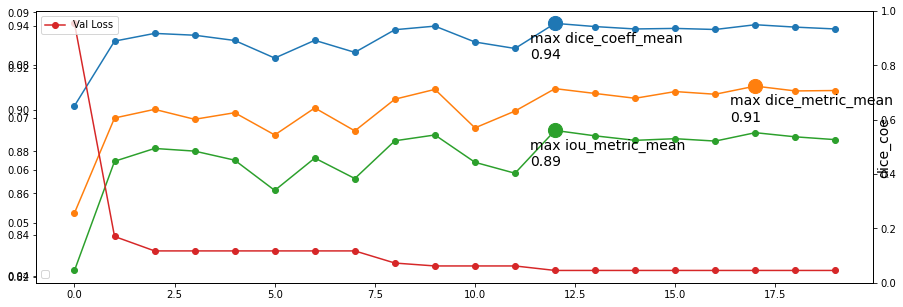

In [7]:
plot_results(metrics)

In [8]:
metrics = pd.read_json(PATH/'43_pytorch_unet_efficientnet_b7_2048_1024_shifted_slices_groupkfold_smooth_b6_fold_1')
metrics

,avg_loss,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.081268,0.081268,0.913513,0.877839,0,1,0.841837
1,0.044932,0.044932,0.938074,0.910239,1,1,0.884399
2,0.039388,0.039388,0.942826,0.917916,2,1,0.892402
3,0.048955,0.039388,0.934438,0.902166,3,1,0.878205
4,0.042324,0.039388,0.940129,0.913242,4,1,0.888150
5,0.044436,0.039388,0.939445,0.905544,5,1,0.886788
6,0.046056,0.039388,0.935535,0.903739,6,1,0.879871
7,0.040238,0.039388,0.943721,0.918403,7,1,0.894045
8,0.039959,0.039388,0.942577,0.917581,8,1,0.892202
9,0.039587,0.039388,0.943265,0.917919,9,1,0.893261


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


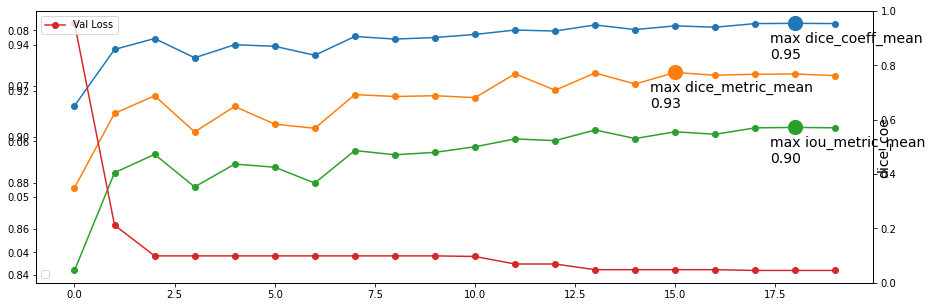

In [9]:
plot_results(metrics)

In [10]:
metrics = pd.read_json(PATH/'43_pytorch_unet_efficientnet_b7_2048_1024_shifted_slices_groupkfold_smooth_b6_fold_2')
metrics

,avg_loss,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.131194,0.131194,0.864269,0.815523,0,2,0.768732
1,0.061735,0.061735,0.910611,0.863576,1,2,0.843141
2,0.057872,0.057872,0.915759,0.874073,2,2,0.849502
3,0.062507,0.057872,0.909480,0.865692,3,2,0.841822
4,0.066150,0.057872,0.902500,0.854274,4,2,0.831297
5,0.078793,0.057872,0.880523,0.830926,5,2,0.805555
6,0.060917,0.057872,0.911138,0.866064,6,2,0.844559
7,0.072814,0.057872,0.890744,0.836544,7,2,0.819661
8,0.061525,0.057872,0.909586,0.858237,8,2,0.842143
9,0.059184,0.057872,0.912901,0.867885,9,2,0.848074


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


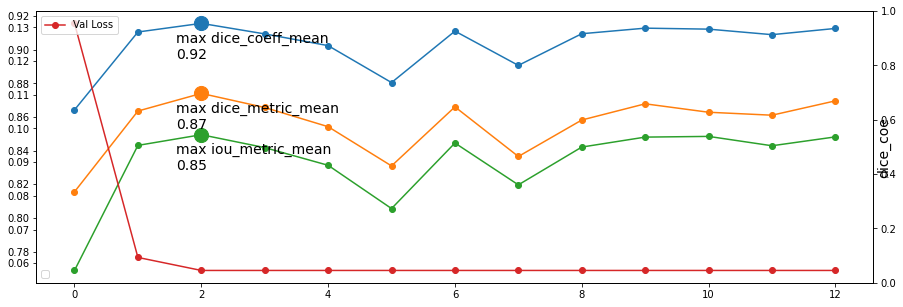

In [11]:
plot_results(metrics)

In [12]:
metrics = pd.read_json(PATH/'43_pytorch_unet_efficientnet_b7_2048_1024_shifted_slices_groupkfold_smooth_b6_fold_3')
metrics

,avg_loss,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.145788,0.145788,0.866498,0.808370,0,3,0.776135
1,0.057285,0.057285,0.920874,0.874100,1,3,0.858920
2,0.060978,0.057285,0.912610,0.865555,2,3,0.842591
3,0.058226,0.057285,0.919057,0.871713,3,3,0.853907
4,0.062610,0.057285,0.911082,0.865638,4,3,0.845272
5,0.050611,0.050611,0.930127,0.898300,5,3,0.870844
6,0.048344,0.048344,0.932918,0.893278,6,3,0.876091
7,0.050027,0.048344,0.928119,0.880713,7,3,0.869206
8,0.052397,0.048344,0.925749,0.884421,8,3,0.867003
9,0.054046,0.048344,0.923153,0.882929,9,3,0.863454


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


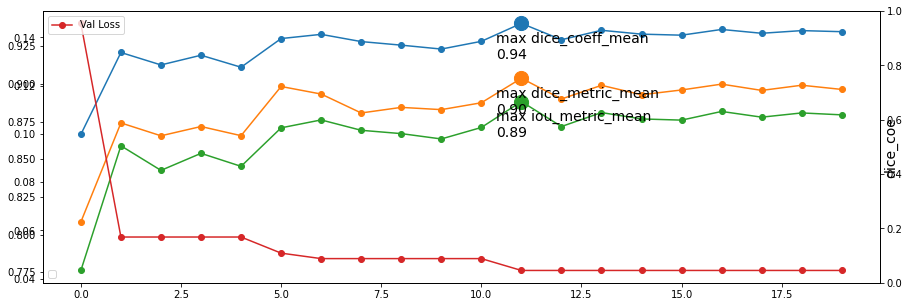

In [13]:
plot_results(metrics)